# Homework 4 - Data visualization

## Part 1 - Loading packages / data

In [36]:
import pandas as pd
import seaborn as sns
titanicDataset = sns.load_dataset("titanic")

,Column,Total,NAs
survived,survived,891,0
pclass,pclass,891,0
sex,sex,891,0
age,age,891,177
sibsp,sibsp,891,0
parch,parch,891,0
fare,fare,891,0
embarked,embarked,891,2
class,class,891,0
who,who,891,0


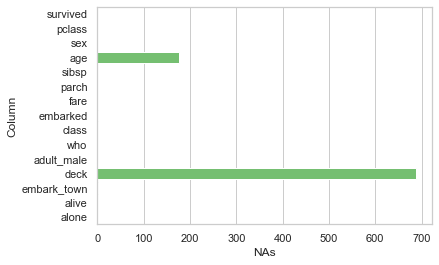

In [55]:
# make dataframe indicating T/F for NaNs at each position
titanicMissing = titanicDataset.isnull()

# make dataframe with column name, total observations, and number of NAs
missingToPlot = pd.DataFrame(columns = ['Column', 'Total', 'NAs'])
for column in titanicMissing:
    tempRow = pd.DataFrame({'Column':[column],
                            'Total':[titanicMissing[column].count()],
                            'NAs':[len(titanicMissing[titanicMissing[column] == True])]},
                            index=[column])
    missingToPlot = missingToPlot.append(tempRow)

# table representation of missing values per column
display(missingToPlot)

# make barplot for amount of NA values per column
# initialize figure
sns.set(style="whitegrid")
sns.set_color_codes("muted")
p_columnMissing = sns.barplot(x='NAs', y='Column', data=missingToPlot, label='NAs', color='g')

